In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import cifar100

import warnings
warnings.filterwarnings('ignore')

In [2]:
(train_img,train_labels), (test_img,test_labels) = cifar100.load_data()
x = test_img
y = test_labels

169001437/169001437 [==============================] - 13s 0us/step


In [3]:
x.shape

(10000, 32, 32, 3)

In [4]:
train_img.shape[0]

50000

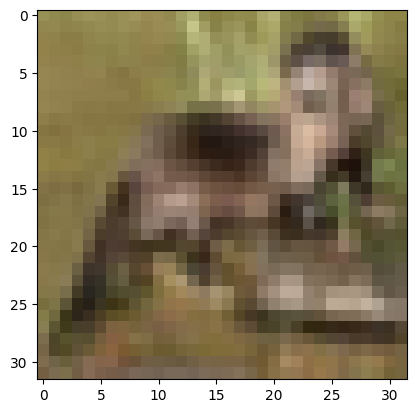

Số này là: [39]


In [5]:
cifar = train_img[100]
plt.imshow(cifar, cmap = plt.cm.binary)
plt.show()
print('Số này là:', train_labels[200])

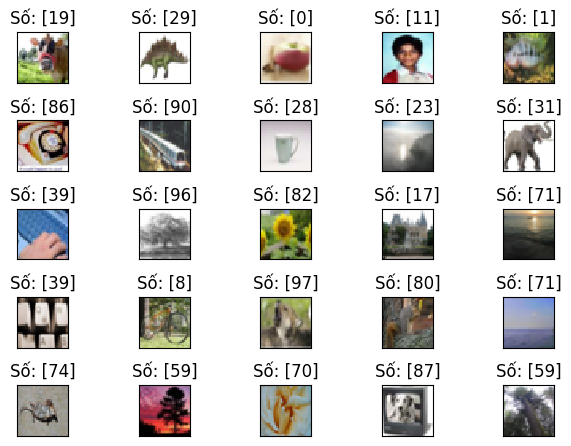

In [6]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_img[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
train_imgs = train_img.reshape(train_img.shape[0],-1)
train_img = train_imgs.astype('float32')/255

test_imgs = test_img.reshape(test_img.shape[0],-1)
test_imgs = test_imgs.astype('float32')/255

train_labels= to_categorical(train_labels,100) #one hot encoding
test_labels = to_categorical(test_labels,100)

In [12]:
model = Sequential()

model.add(Dense(3060, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(1264, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3060)              9403380   
                                                                 
 dense_6 (Dense)             (None, 1264)              3869104   
                                                                 
 dense_7 (Dense)             (None, 100)               126500    
                                                                 
Total params: 13,398,984
Trainable params: 13,398,984
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_imgs,train_labels,epochs = 30, batch_size = 3000)
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('Mất mát: ', test_loss)
print("Độ chính xác: ", test_acc)

Epoch 1/30
17/17 [==============================] - 2s 52ms/step - loss: 3945.7937 - accuracy: 0.0099
Epoch 2/30
17/17 [==============================] - 1s 47ms/step - loss: 30.1949 - accuracy: 0.0165
Epoch 3/30
17/17 [==============================] - 1s 47ms/step - loss: 4.7570 - accuracy: 0.0219
Epoch 4/30
17/17 [==============================] - 1s 47ms/step - loss: 4.6841 - accuracy: 0.0291
Epoch 5/30
17/17 [==============================] - 1s 47ms/step - loss: 4.8733 - accuracy: 0.0319
Epoch 6/30
17/17 [==============================] - 1s 48ms/step - loss: 20.0797 - accuracy: 0.0248
Epoch 7/30
17/17 [==============================] - 1s 47ms/step - loss: 219.9437 - accuracy: 0.0106
Epoch 8/30
17/17 [==============================] - 1s 49ms/step - loss: 125.2025 - accuracy: 0.0126
Epoch 9/30
17/17 [==============================] - 1s 50ms/step - loss: 86.0081 - accuracy: 0.0135
Epoch 10/30
17/17 [==============================] - 1s 50ms/step - loss: 74.1994 - accuracy: 0.016